In [1]:
#import shenanigans
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy import stats

In [2]:
#read and load data
data1 = pd.read_csv('model1.csv')
data2 = pd.read_csv('model2.csv')
data3 = pd.read_csv('model3.csv')

In [3]:
#Convert Dates to Datetime
data1['Date'] = pd.to_datetime(data1.Date, format='%Y-%m-%d')
data2['Date'] = pd.to_datetime(data2.Date, format='%Y-%m-%d')
data3['Date'] = pd.to_datetime(data3.Date, format='%Y-%m-%d')

#Convert Returns from percentage to decimal
data1["Return"] = data1["Return"]/100
data2["Return"] = data2["Return"]/100
data3["Return"] = data3["Return"]/100

In [4]:
#Remove duplicated records; keep last
data1 = data1[~data1[['Date', 'GVKEY']].duplicated(keep='last')]
data2 = data2[~data2[['Date', 'GVKEY']].duplicated(keep='last')]
data3 = data3[~data3[['Date', 'GVKEY']].duplicated(keep='last')]

### Question 1

In [5]:
#Create function to solve question 1
def Question1(dataset):
    datelist = np.sort(dataset["Date"].unique())[::-1]
    depParams = dataset.columns[3:].tolist()
    
    MainTable = pd.DataFrame(index = datelist, 
                         columns = [["Constant"] + depParams + ["Adjusted R2"] + ["No. of Firms"]])
    
    SideTable = pd.DataFrame(index = datelist, 
                         columns = [["Constant"] + depParams])
    
    for currdate in datelist:
        datatmp = dataset[dataset["Date"]==currdate].reset_index(drop = True).copy()
        if (len(datatmp)>1):            
            reg = sm.OLS(datatmp["Return"], sm.add_constant(datatmp[depParams])).fit()
            MainTable.loc[currdate, "Constant"] = reg.params[0]
            SideTable.loc[currdate, "Constant"] = reg.bse[0]
            for i in range(0,len(depParams)):
                exec("MainTable.loc[currdate, depParams[{0}]] = reg.params[{1}]".format(i, i+1))
                exec("SideTable.loc[currdate, depParams[{0}]] = reg.bse[{1}]".format(i, i+1))
            MainTable.loc[currdate, "Adjusted R2"] = reg.rsquared_adj
            MainTable.loc[currdate, "No. of Firms"] = reg.nobs
        else: 
            MainTable.loc[currdate, "No. of Firms"] = 1
    SideTable = SideTable.replace([np.inf, -np.inf], np.nan)
    return MainTable, SideTable

In [6]:
#Solve and save down answer tables
data1_result1, data1_result1b = Question1(data1)
data1_result1.to_csv (r'data1_result1.csv', index = True, header=True)
data1_result1b.to_csv (r'data1_result1b.csv', index = True, header=True)

data2_result1, data2_result1b = Question1(data2)
data2_result1.to_csv (r'data2_result1.csv', index = True, header=True)
data2_result1b.to_csv (r'data2_result1b.csv', index = True, header=True)

data3_result1, data3_result1b = Question1(data3)
data3_result1.to_csv (r'data3_result1.csv', index = True, header=True)
data3_result1b.to_csv (r'data3_result1b.csv', index = True, header=True)

### Question 2

In [7]:
def Question2(dataset_result1, dataset_result1b):
    data_result2 = pd.DataFrame(index = dataset_result1.columns[:-2],
                             columns = ["Mean", "StdErr", "T-Stat", "P-Stat","Sig"])
    for col in data_result2.index:
        data_result2.loc[col,"Mean"] = dataset_result1[col].mean()
        data_result2.loc[col,"StdErr"] = dataset_result1b[col].mean()
        tvalue = stats.ttest_1samp(dataset_result1[col].dropna(),0)[0]
        pvalue = stats.ttest_1samp(dataset_result1[col].dropna(),0)[1]
        data_result2.loc[col,"T-Stat"] = tvalue
        data_result2.loc[col,"P-Stat"] = pvalue
        if pvalue < 0.1:
            if pvalue < 0.05:
                if pvalue < 0.01:
                    data_result2.loc[col,"Sig"] = "1%"
                else:
                    data_result2.loc[col,"Sig"] = "5%"
            else:
                data_result2.loc[col,"Sig"] = "10%"
        else:
            data_result2.loc[col,"Sig"] = "NotSig"
    return data_result2

In [8]:
data1_result1

,Constant,LogSize_-1,LogB/M_-1,"Return_-2,-12",Adjusted R2,No. of Firms
2021-03-31,0.070153,0.001472,0.020264,-0.013328,0.046385,923.0
2021-02-28,0.194326,-0.007977,0.039267,0.019392,0.061897,1004.0
2021-01-31,0.220899,-0.016224,0.067245,0.297142,0.042235,1173.0
2020-12-31,0.163836,-0.01281,-0.010294,-0.015446,0.013615,3468.0
2020-11-30,0.288554,-0.012023,0.017516,-0.04559,0.03288,3500.0
...,...,...,...,...,...,...
1964-08-31,0.187475,-0.0167,0.141974,-0.600251,NaN,3.0
1964-07-31,-0.055355,0.00644,-0.052775,0.14927,NaN,3.0
1964-06-30,-0.977434,0.187247,0.258189,0.179663,NaN,3.0
1964-05-31,-0.060533,0.009142,0.073093,0.368732,NaN,3.0


In [9]:
data1_result2 = Question2(data1_result1, data1_result1b)
data1_result2.to_csv (r'data1_result2.csv', index = True, header=True)

data2_result2 = Question2(data2_result1, data2_result1b)
data2_result2.to_csv (r'data2_result2.csv', index = True, header=True)

data3_result2 = Question2(data3_result1, data3_result1b)
data3_result2.to_csv (r'data3_result2.csv', index = True, header=True)

In [10]:
data1_result2

,Mean,StdErr,T-Stat,P-Stat,Sig
Constant,0.016094,0.01377,4.62062,0.000005,1%
LogSize_-1,-0.000803,0.002584,-1.69462,0.090603,10%
LogB/M_-1,0.004783,0.005609,5.277325,0.0,1%
"Return_-2,-12",0.011512,0.009874,5.030341,0.000001,1%


In [11]:
data2_result2

,Mean,StdErr,T-Stat,P-Stat,Sig
Constant,0.015235,0.020492,2.557301,0.010775,5%
LogSize_-1,-0.000445,0.003986,-0.413936,0.679058,NotSig
LogB/M_-1,0.004609,0.007495,4.832851,0.000002,1%
"Return_-2,-12",0.012227,0.015672,2.759604,0.00595,1%
"LogIssues_-1,-36",-0.005636,0.013802,-1.597059,0.110739,NotSig
Accruals_Yr-1,-0.000004,0.000067,-0.293948,0.768892,NotSig
ROA_Yr-1,-0.00024,0.085726,-0.012983,0.989645,NotSig
LogAG_Yr-1,-0.003767,0.027171,-0.911634,0.3623,NotSig


In [12]:
data3_result2

,Mean,StdErr,T-Stat,P-Stat,Sig
Constant,0.015484,0.015709,4.479822,0.000009,1%
LogSize_-1,-0.00101,0.002594,-1.775176,0.076354,10%
LogB/M_-1,0.002265,0.006823,2.403627,0.016523,5%
"Return_-2,-12",0.006645,0.010928,3.730254,0.000209,1%
"LogIssues_-1,-36",-0.000919,0.013874,-0.207548,0.83565,NotSig
Accruals_Yr-1,-0.000013,0.000042,-1.016147,0.309952,NotSig
ROA_Yr-1,0.015216,0.064006,2.258956,0.024229,5%
LogAG_Yr-1,-0.007115,0.020817,-3.827034,0.000143,1%
"DY_-1,-12",0.004186,0.195149,0.209533,0.8341,NotSig
"LogReturn_-13,-36",0.000001,0.006396,0.001551,0.998763,NotSig


### Question 3

In [13]:
datelist = np.sort(data3["Date"].unique())

In [14]:
TenyrAvg = pd.DataFrame(index =range(0,len(datelist)-150))
for i in range(len(datelist)-150):
    TenyrAvg.loc[i,"StartDate"] = datelist[i+30]
    TenyrAvg.loc[i,"EndDate"] = datelist[i+149]
    TenyrAvg.loc[i,"ForecastDate"] = datelist[i+150]
Q3Table = TenyrAvg.copy()
TenyrAvg = TenyrAvg.reindex(columns = ["StartDate", "EndDate", "ForecastDate", "Constant"] + data3.columns[3:].tolist()).copy()

In [15]:
for i in range(len(TenyrAvg)):
    TenyrAvg.iloc[i,3:] = data3_result1[(data3_result1.index>=TenyrAvg["StartDate"][i]) &
                                        (data3_result1.index<=TenyrAvg["EndDate"][i])].reset_index(drop=True).mean(axis = 0)[:-2]

In [16]:
data3 = data3[data3['Date']>=TenyrAvg["ForecastDate"][0]].reset_index(drop=True).copy()
data3_report = data3.copy()
data3_report["Return_Est"] = np.nan

In [17]:
foredatelist = TenyrAvg['ForecastDate'].tolist()
for i in range(len(foredatelist)):
    const = TenyrAvg[TenyrAvg["ForecastDate"] == foredatelist[i]].iloc[0,3]
    coeff = np.array(TenyrAvg[TenyrAvg["ForecastDate"] == foredatelist[i]].iloc[:,4:])
    varbl = np.array(data3[data3["Date"] == foredatelist[i]].iloc[:,3:])
    Ret_Est = np.matmul(varbl, coeff.transpose()) + const
    data3_report.loc[data3_report["Date"] == foredatelist[i],"Return_Est"] = Ret_Est

In [18]:
Q3Mid = data3_report.loc[:,['GVKEY', 'Date', 'Return', 'Return_Est']].copy()
Q3Mid.columns = ['GVKEY', 'Date', 'Rt+1', 'E(Rt+1)']

In [19]:
Q3Mid['Rt'] = Q3Mid.groupby('GVKEY')['Rt+1'].shift(1)

Q3Mid['LHS'] = Q3Mid['Rt+1'] - Q3Mid['Rt']
Q3Mid['RHS'] = Q3Mid['E(Rt+1)'] - Q3Mid['Rt']

Q3Mid['Sign'] = np.sign(Q3Mid['RHS']) * np.sign(Q3Mid['LHS'])
Q3Mid.dropna(inplace = True)

In [20]:
#Remove Sign = 0 records
Q3MidRaw = Q3Mid.copy()
Q3Mid = Q3Mid[Q3Mid['Sign']!=0].reset_index(drop=True).copy()

In [21]:
Q3 = pd.pivot_table(Q3Mid, values='GVKEY', index='Date', columns='Sign', aggfunc='count').copy()
Q3['NStk'] = Q3Mid.groupby('Date')["GVKEY"].nunique()

Q3.columns = ['No. of -1’s','No. of +1’s','Total Number of Stocks']

In [22]:
Q3

,No. of -1’s,No. of +1’s,Total Number of Stocks
Date,,,
1980-10-31,459,1268,1727
1980-11-30,529,1181,1710
1980-12-31,392,1302,1694
1981-01-31,417,1245,1662
1981-02-28,370,1291,1661
...,...,...,...
2020-11-30,556,1260,1816
2020-12-31,378,1452,1830
2021-01-31,137,451,588


In [23]:
Q3.columns = ["IncorrectObs", "CorrectObs", "NObs"]
Q3["Correct"] = Q3["CorrectObs"]/Q3["NObs"]
Q3["Incorrect"] = Q3["IncorrectObs"]/Q3["NObs"]

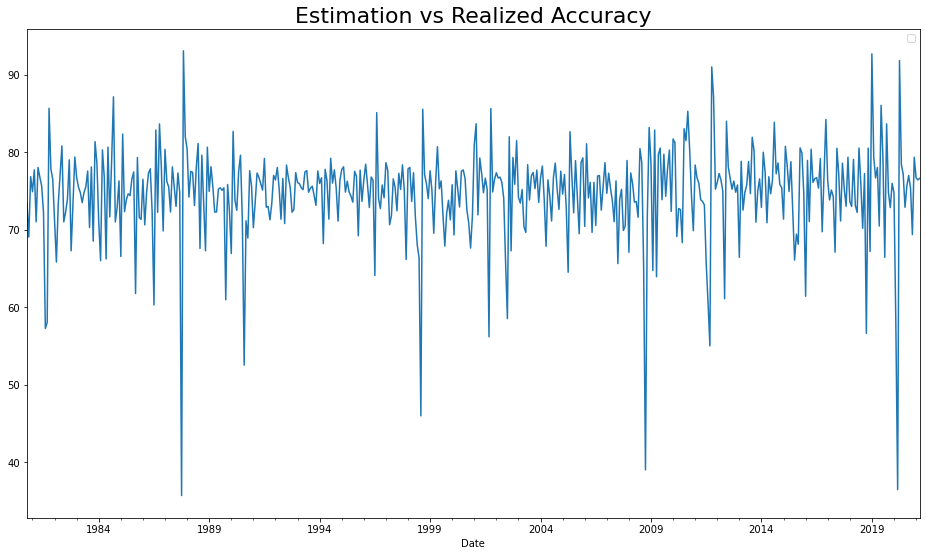

In [24]:
(Q3.iloc[:,3:4]*100).plot(figsize = (16,9))
plt.title("Estimation vs Realized Accuracy",size=22)
plt.legend('')
plt.show()
#plt.savefig('Accuracy.png')

In [25]:
Q3.to_csv (r'data3_Q3.csv', index = True, header=True)

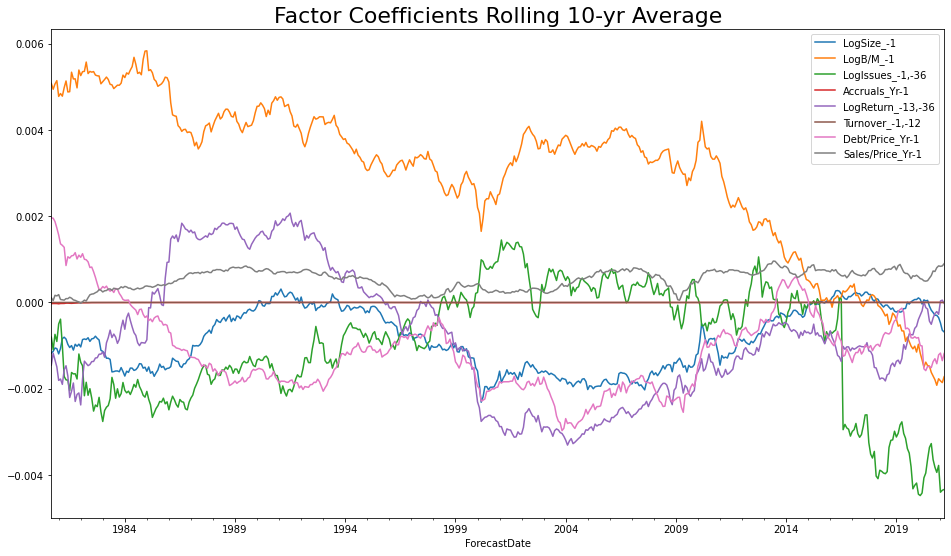

In [26]:
TenyrAvg.loc[:,['ForecastDate','LogSize_-1', 'LogB/M_-1', 'LogIssues_-1,-36', 'Accruals_Yr-1', 'LogReturn_-13,-36','Turnover_-1,-12', 'Debt/Price_Yr-1','Sales/Price_Yr-1']].set_index('ForecastDate').plot(figsize = (16,9))
plt.title("Factor Coefficients Rolling 10-yr Average",size=22)
#plt.legend('')
plt.show()

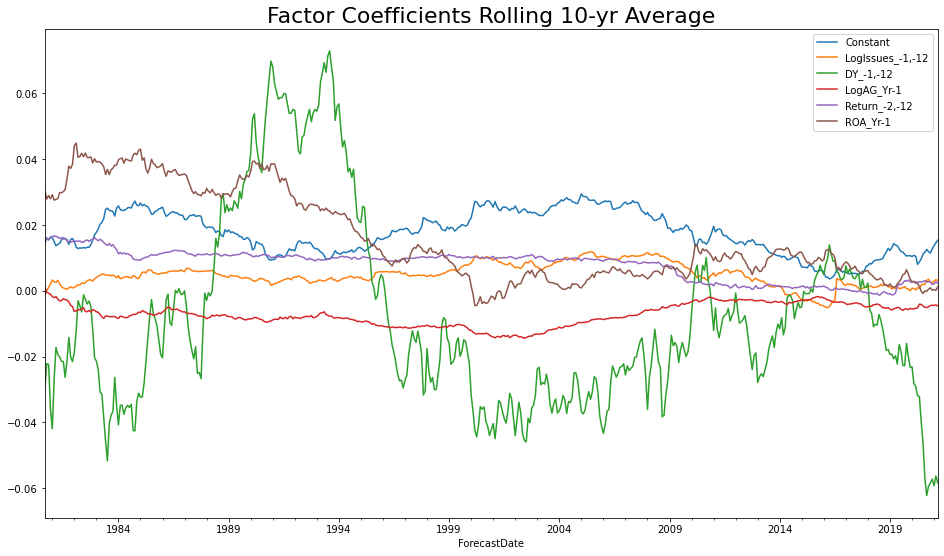

In [27]:
TenyrAvg.loc[:,['ForecastDate', 'Constant', 'LogIssues_-1,-12', 'DY_-1,-12', 'LogAG_Yr-1','Return_-2,-12', 'ROA_Yr-1']].set_index('ForecastDate').plot(figsize = (16,9))
plt.title("Factor Coefficients Rolling 10-yr Average",size=22)
#plt.legend('')
plt.show()

In [28]:
TenyrAvg.columns[2:]

Index(['ForecastDate', 'Constant', 'LogSize_-1', 'LogB/M_-1', 'Return_-2,-12',
       'LogIssues_-1,-36', 'Accruals_Yr-1', 'ROA_Yr-1', 'LogAG_Yr-1',
       'DY_-1,-12', 'LogReturn_-13,-36', 'LogIssues_-1,-12', 'Turnover_-1,-12',
       'Debt/Price_Yr-1', 'Sales/Price_Yr-1'],
      dtype='object')

In [29]:
len(TenyrAvg.columns[2:])/2

7.5

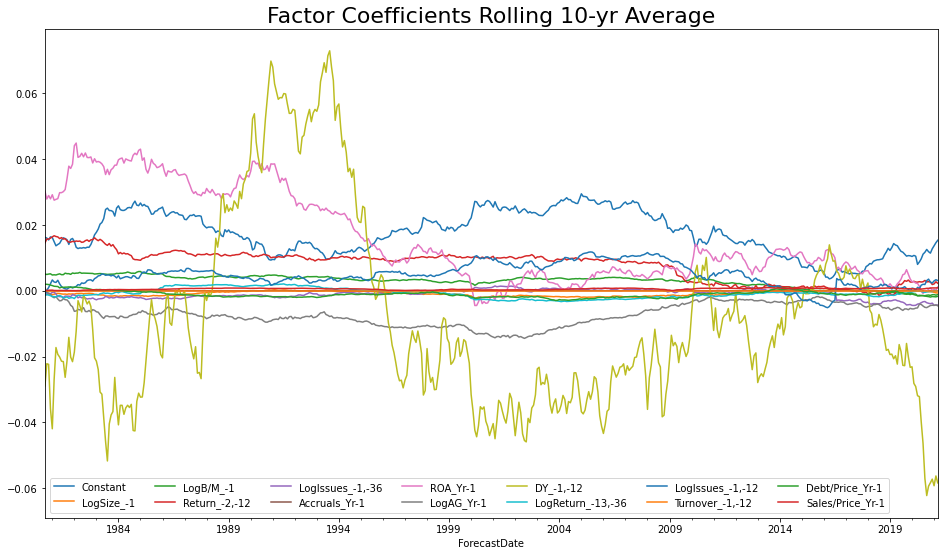

In [30]:
TenyrAvg.iloc[:,2:].set_index('ForecastDate').plot(figsize = (16,9))
plt.title("Factor Coefficients Rolling 10-yr Average",size=22)
#plt.legend(loc=0, prop={'size': 16})
plt.legend(loc="lower left", ncol = 7 )
#plt.legend('')
plt.show()

In [33]:
TenyrAvg.iloc[-1,:]

StartDate            2011-03-31 00:00:00
EndDate              2021-02-28 00:00:00
ForecastDate         2021-03-31 00:00:00
Constant                        0.015326
LogSize_-1                     -0.000683
LogB/M_-1                      -0.001722
Return_-2,-12                   0.002265
LogIssues_-1,-36               -0.004335
Accruals_Yr-1                        0.0
ROA_Yr-1                        0.001151
LogAG_Yr-1                     -0.004584
DY_-1,-12                       -0.05838
LogReturn_-13,-36              -0.000021
LogIssues_-1,-12                0.003096
Turnover_-1,-12                     -0.0
Debt/Price_Yr-1                -0.001183
Sales/Price_Yr-1                0.000898
Name: 486, dtype: object